In [1]:
# model with double the filters for the fashion mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

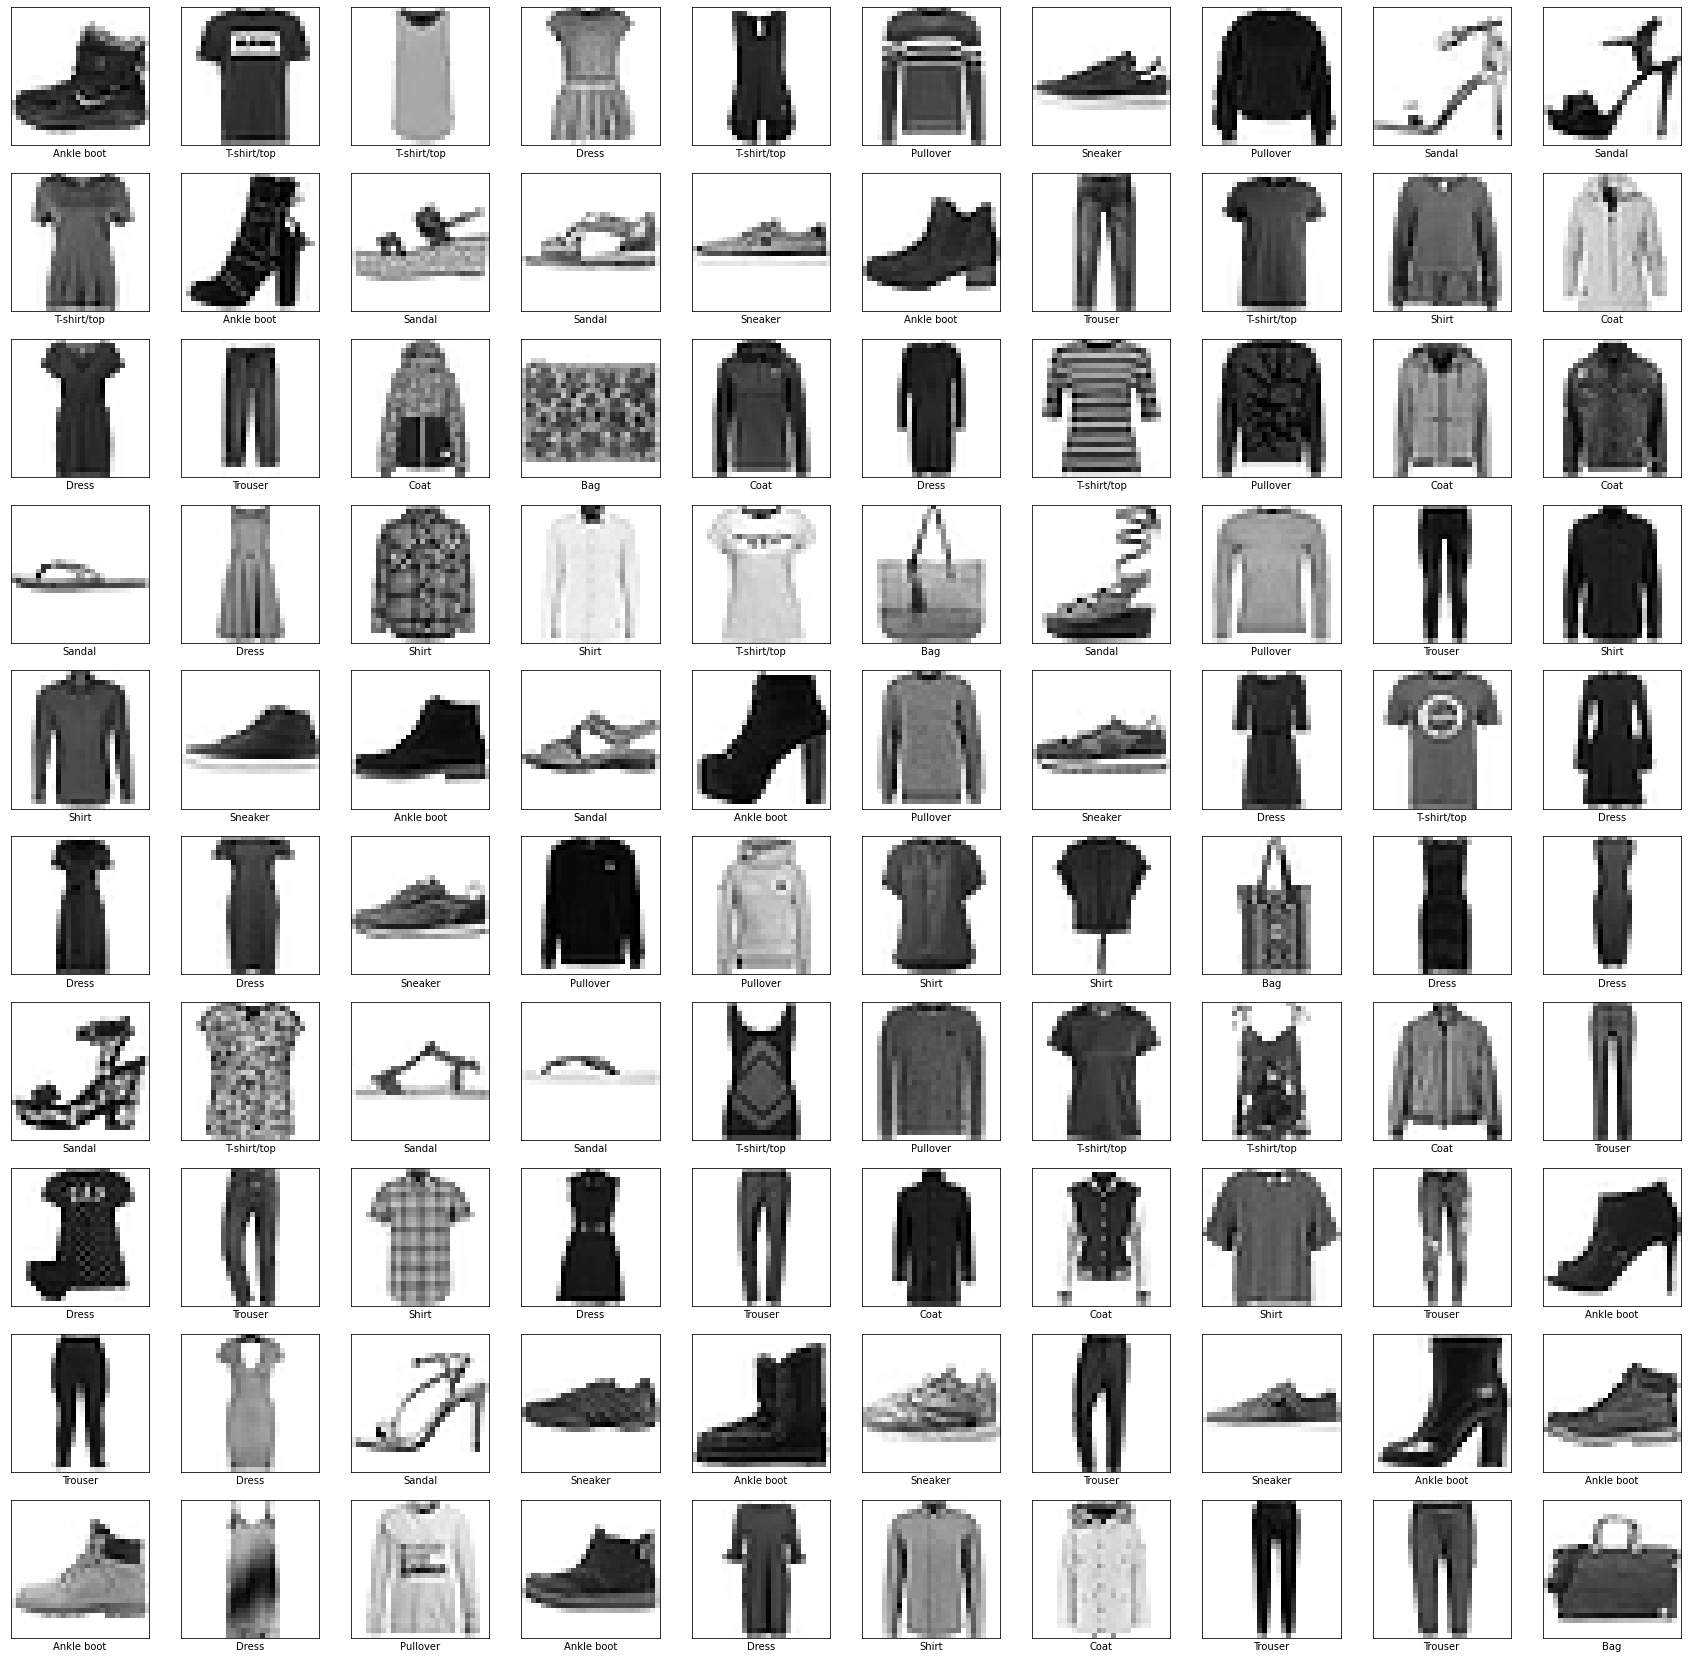

In [4]:
pyplot.figure(figsize=(30,30))
for i in range(100):
    pyplot.subplot(10,10,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(x_train[i], cmap=pyplot.cm.binary)
    pyplot.xlabel(class_names[y_train[i]])


In [5]:
print("train_images:", x_train.shape)
print("test_images:", x_test.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


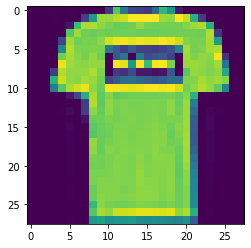

In [6]:
pyplot.figure()
pyplot.imshow(x_train[1])
#pyplot.colorbar()
pyplot.grid(False)

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [9]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
test = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_valid, y_valid), callbacks=[checkpointer])

Epoch 1/20
550/550 [==============================] - 49s 88ms/step - loss: 0.8929 - accuracy: 0.6687 - val_loss: 0.4100 - val_accuracy: 0.8580

Epoch 00001: val_loss improved from inf to 0.41001, saving model to model.weights.best.hdf5
Epoch 2/20
550/550 [==============================] - 47s 86ms/step - loss: 0.4475 - accuracy: 0.8374 - val_loss: 0.3501 - val_accuracy: 0.8772

Epoch 00002: val_loss improved from 0.41001 to 0.35015, saving model to model.weights.best.hdf5
Epoch 3/20
550/550 [==============================] - 48s 87ms/step - loss: 0.3932 - accuracy: 0.8578 - val_loss: 0.3076 - val_accuracy: 0.8886

Epoch 00003: val_loss improved from 0.35015 to 0.30759, saving model to model.weights.best.hdf5
Epoch 4/20
550/550 [==============================] - 48s 86ms/step - loss: 0.3630 - accuracy: 0.8688 - val_loss: 0.2929 - val_accuracy: 0.8908

Epoch 00004: val_loss improved from 0.30759 to 0.29290, saving model to model.weights.best.hdf5
Epoch 5/20
550/550 [====================

In [12]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [13]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9193000197410583


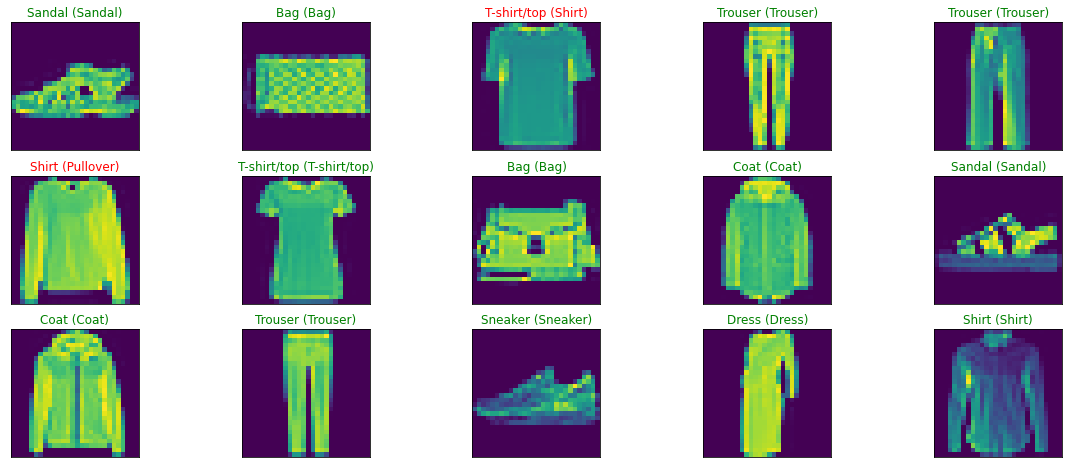

In [16]:
import numpy as np
y_hat = model.predict(x_test)
predicted_label = []
for i in range(y_hat.shape[0]):
    predicted_label.append(np.argmax(y_hat[i]))

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = pyplot.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

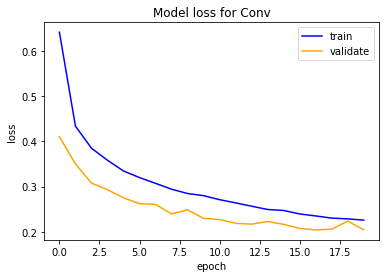

In [17]:
#Plot loss results for training data and testing data 
pyplot.plot(test.history['loss'], 'blue')
pyplot.plot(test.history['val_loss'], 'orange')
pyplot.title('Model loss for Conv')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validate'], loc='upper right')

In [28]:
truth_label = np.argmax(y_test, axis = 1)

from sklearn.metrics import confusion_matrix
confusion_matrix(truth_label, predicted_label)

array([[887,   0,  19,  13,   3,   1,  73,   0,   4,   0],
       [  0, 986,   0,   8,   2,   0,   2,   0,   2,   0],
       [ 16,   1, 885,   8,  36,   0,  54,   0,   0,   0],
       [ 13,  13,  10, 917,  25,   0,  20,   0,   2,   0],
       [  0,   0,  49,  20, 880,   0,  51,   0,   0,   0],
       [  0,   0,   0,   0,   0, 989,   0,   7,   0,   4],
       [109,   0,  57,  24,  71,   0, 731,   0,   8,   0],
       [  0,   0,   0,   0,   0,   9,   0, 961,   0,  30],
       [  1,   1,   2,   4,   4,   1,   0,   0, 987,   0],
       [  0,   0,   0,   0,   0,   5,   1,  24,   0, 970]], dtype=int64)